# Student Alcohol Usage and Grades

In this notebook you will perform exploratory data analysis on a dataset from Kaggle about student alcohol usage, grades and other personal and family background information. The dataset can be found here:

https://www.kaggle.com/uciml/student-alcohol-consumption

This page also contains a description of the measured variables. After each visualization you will be asked to draw conclusions based on the visualization. You will write those conclusions in complete sentences. Imagine yourself presenting this notebook to the school board members, who are not intereste in code and data. Your conclusions should be written so that an audience such as this could make informed decisions from your analysis.

## Imports

In [33]:
from altair import *
import pandas as pd
import numpy as np

## Data

Here we import the data as a Pandas `DataFrame`:

In [34]:
students = pd.read_csv('/data/student-alcohol-consumption/student-mat.csv')

In [35]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [36]:
len(students)

395

In [37]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## What things are correlated with alchohol usage?

The first things we will explore is alcohol usage. There are a number of variables in this dataset that may display covariation or correlation with alcohol usage. Before exploring these things, create a new variable for total alcohol usage (sum of the workday and weekend alcohol usage). Name this new column `Talc` in the `DataFrame` `Talc`:

In [38]:
students['Talc'] = students.Walc + students.Dalc

In [24]:
assert 'Talc' in students.columns
assert students.Talc.dtype==int

In the next cell create a visualization that shows the variation of total alcohol usage:

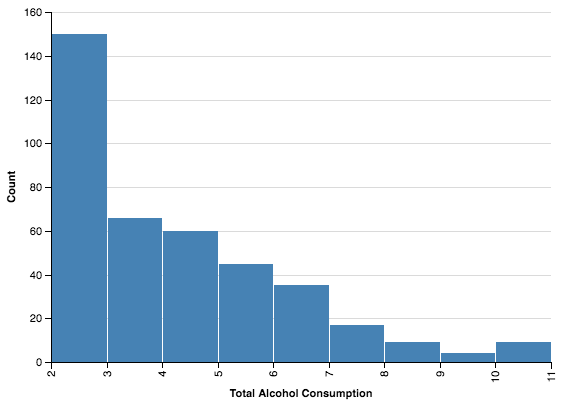

In [25]:
Chart(students).mark_bar().encode(
    X('Talc:Q', bin=True, title='Total Alcohol Consumption'),
    Y('count(*):Q', title='Count')
)

In the next markdown cell describe your conclusions from this visualization in complete sentences:

Alcohol consumption is not a common occurence for the majority of the students, but the number of those that do consume (> 2) tapers off over the range. That trend is broken by a small group of students that drink heavily on the weekends and the weekdays.

In the next cell, create a visualization that helps answer the following question:

> Does internet access at home show covariation with alcohol usage?

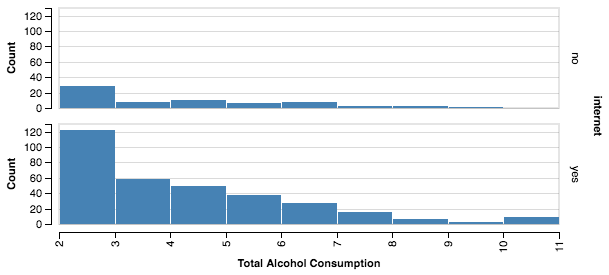

In [71]:
Chart(students).mark_bar().encode(
    X('Talc:Q', bin=True, title='Total Alcohol Consumption'),
    Y('count(*):Q', title='Count', axis=Axis(ticks=5)),
    Row('internet')
).configure_cell(height=100)

In the next markdown cell describe your conclusions from this visualization in complete sentences:

Students without internet access are much less common than those with internet access. When comparing both by their total alcohol consumption those with access to the internet are the only ones who report drinking at the highest levels. Aside from those extreme reportings, alcohol consumption rates seem to be comparable across those with and without internet.

In the next cell, create a visualization that helps answers the following question:

> Is going out with friends correlated with total alcohol usage? 

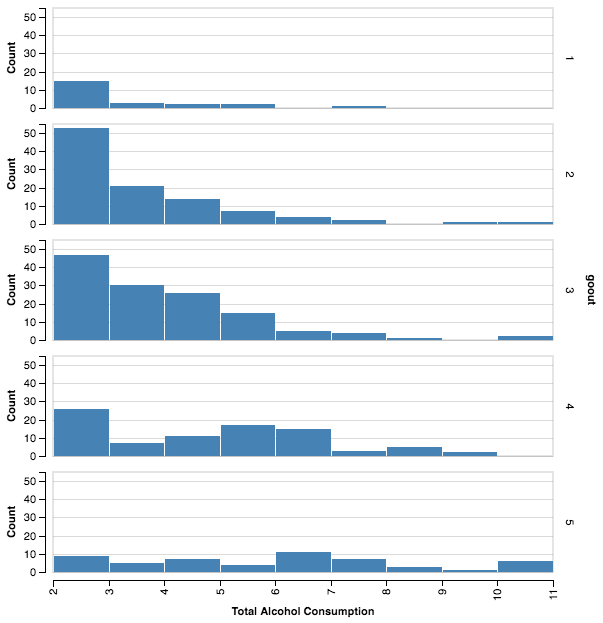

In [72]:
Chart(students).mark_bar().encode(
    X('Talc:Q', bin=True, title='Total Alcohol Consumption'),
    Y('count(*):Q', title='Count', axis=Axis(ticks=5)),
    Row('goout')
).configure_cell(height=100)

In the next markdown cell describe your conclusions from this visualization in complete sentences:

Those students that drink heavily are more likely to report that they go out with friends. The students that report the heaviest levels of alcohol consumption report going out the most with friends.

In the next cell, create a visualization that helps answers the following question:

> What is the relationship between time spent studying and total alcohol usage? 

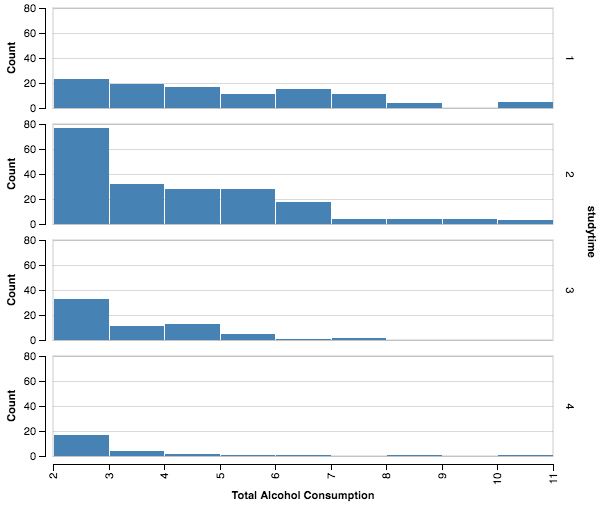

In [73]:
Chart(students).mark_bar().encode(
    X('Talc:Q', bin=True, title='Total Alcohol Consumption'),
    Y('count(*):Q', title='Count', axis=Axis(ticks=5)),
    Row('studytime')
).configure_cell(height=100)

In the next markdown cell describe your conclusions from this visualization in complete sentences:

Those students that report the most alcohol consumption also report studying less, but students that study the most are spread across the levels of alcohol consumption at levels comparable to the original alcohol consumption distribution.

## What things are correlated with getting good grades?

In the next cell, create a visualization that helps answers the following question:

> How do student's plans to attend higher education correlate with their grades?

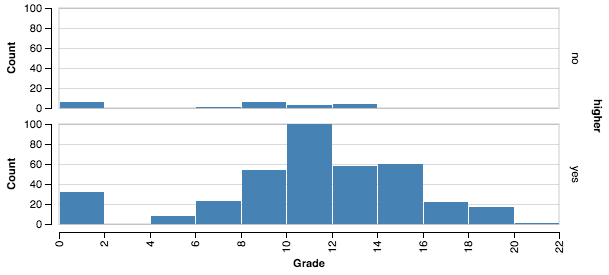

In [74]:
Chart(students).mark_bar().encode(
    X('G3', bin=True, title='Grade'),
    Y('count(*):Q', title='Count', axis=Axis(ticks=5)),
    Row('higher')
).configure_cell(height=100)

In the next markdown cell describe your conclusions from this visualization in complete sentences:

While most students report they have plans for higher education, those that do not disportionately are those that have extremely low grades. The rest of those students occupy the middle of the grade distribution.

In the next cell, create a visualization that helps answers the following question:

> Does a student's mothers education show covariation with their grades?

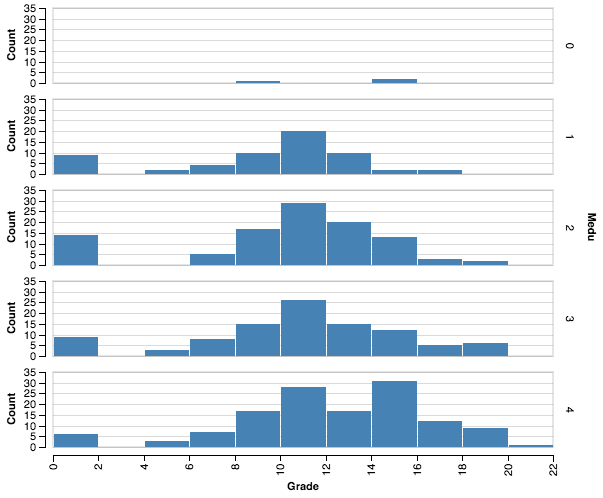

In [79]:
Chart(students).mark_bar().encode(
    X('G3', bin=True, title='Grade'),
    Y('count(*):Q', title='Count', axis=Axis(ticks=6)),
    Row('Medu')
).configure_cell(height=75)

In the next markdown cell describe your conclusions from this visualization in complete sentences:

Higher levels of mother education correlate with higher grades, but the inverse is not true. Those with less educated mothers have a grade distribution that is similar to the base grade distribution.